<a href="https://colab.research.google.com/github/Geeth-Rath/A-ML/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn-extra


## 4 Question

4. Write a Python script to cluster the data using the k-means clustering algorithm.
However, assume that you do not know how many categories there are. Therefore, use
the elbow method to determine how many clusters to look for. I.e., try different values
k=1,2,3…10 and for each k, compute and plot the within cluster variance. Include a
screenshot of your plot and explain how you would use the plot to determine the number
of clusters.


<ipython-input-15-1a93f09f2e55>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)


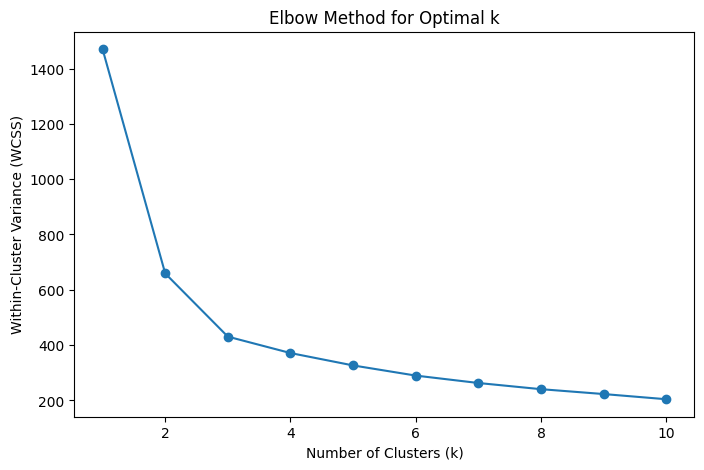

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

X = df.iloc[:, :-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the Elbow Method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Variance (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# The optimal number of clusters is determined by the "elbow" point in the plot.

Answer : The optimal number of clusters is where the elbow or sharp bend in the curve occurs. That means elbow is at k = 3, this means that 3 clusters is the best choice.

## 5 Question

Do the k-means clustering for k=3, the actual number of clusters in the dataset. Evaluate
the quality of clustering using the intrinsic method, Silhouette coefficient, and also the
extrinsic method purity

<ipython-input-16-e6ea895069f1>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)


Silhouette Coefficient: 0.4007
Purity Score: 0.7277


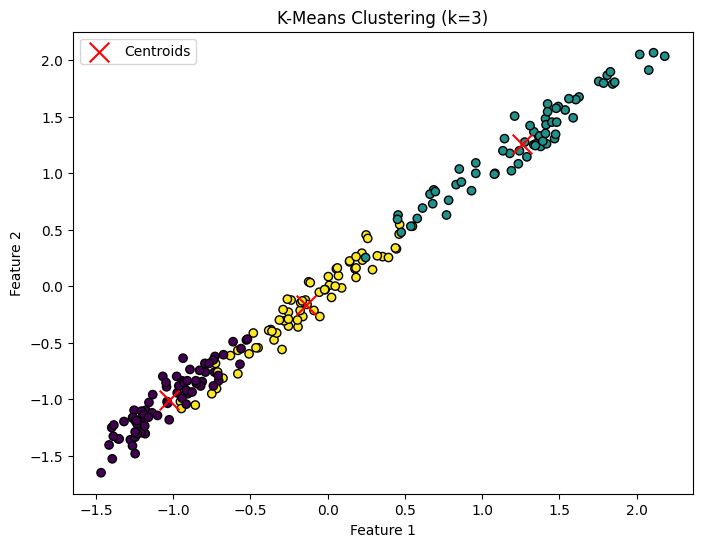

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, homogeneity_score

df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

X = df.iloc[:, :-1]
y_true = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, y_kmeans)
purity = homogeneity_score(y_true, y_kmeans)

print(f"Silhouette Coefficient: {silhouette_avg:.4f}")
print(f"Purity Score: {purity:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()


The Silhouette Coefficient (0.4007) indicates moderate clustering quality, suggesting some overlap between clusters but reasonable separation. The Purity Score (0.7277) shows that about 73% of data points are correctly grouped according to ground truth labels, meaning the clustering aligns well with actual categories. Since k=3 represents the true number of clusters and provides a decent balance between cohesion and separation, it is a reasonable choice for this dataset.

## 6 Question

. Now try out Agglomerative Hierarchical Clustering and experiment with different
linkage methods (e.g., single, complete, average, and ward).

<ipython-input-23-a2d223945953>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)


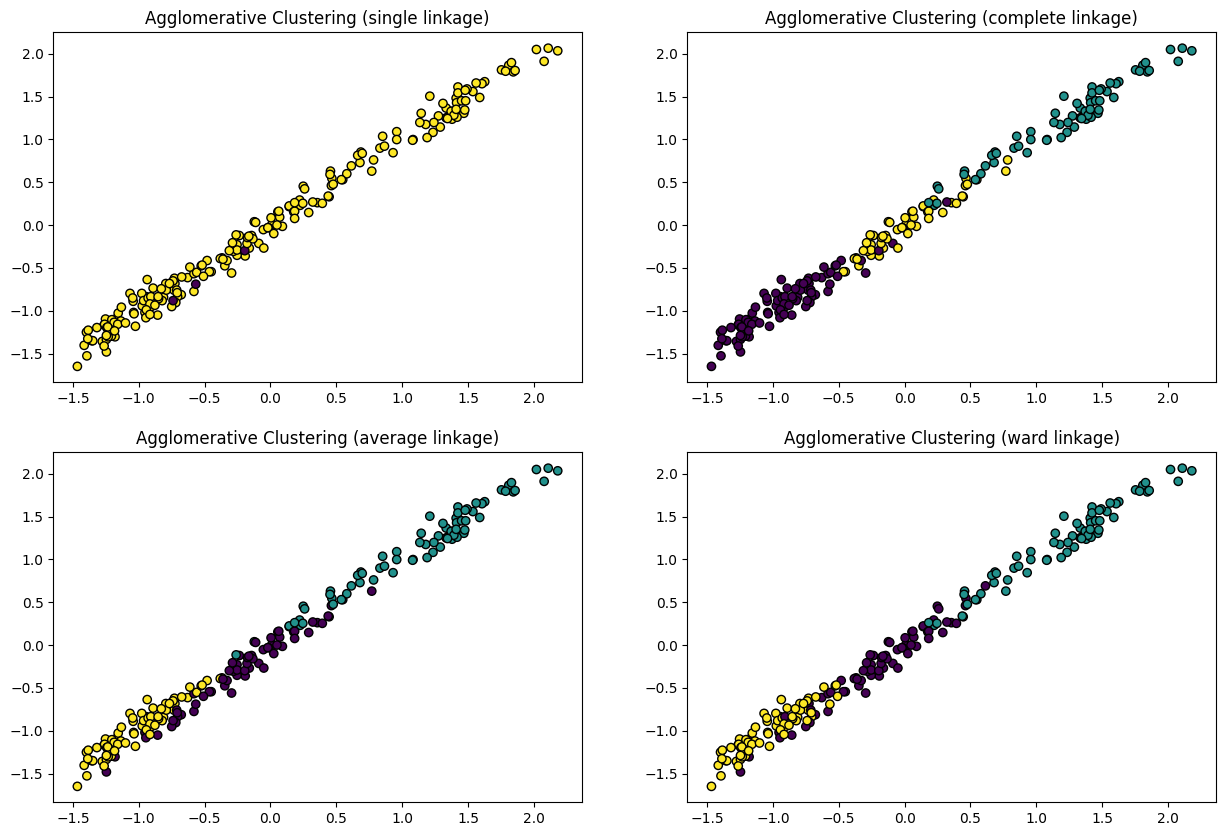

Silhouette Score for single linkage: -0.0056
Silhouette Score for complete linkage: 0.3502
Silhouette Score for average linkage: 0.3760
Silhouette Score for ward linkage: 0.3926


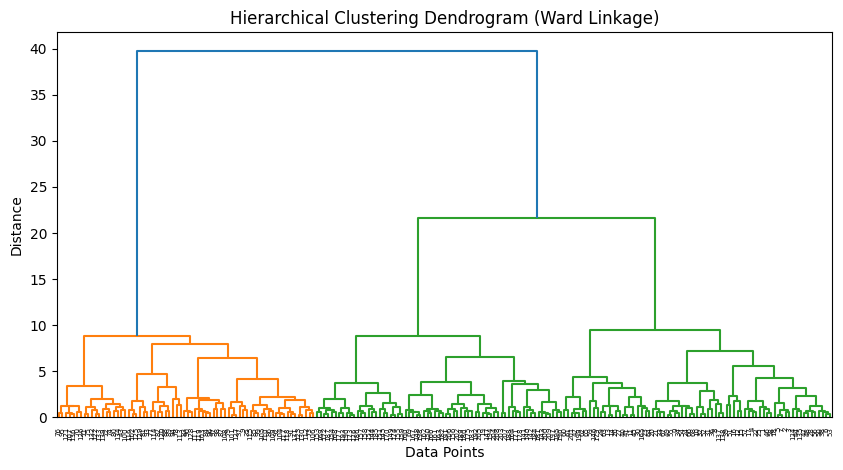

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Load dataset with flexible whitespace handling
df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

# Ensure all values are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values (if necessary)
df.dropna(inplace=True)

# Separate features and true labels
X = df.iloc[:, :-1]  # Exclude the last column (features)
y_true = df.iloc[:, -1].astype(int)  # Convert true labels to integer

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Experiment with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
results = {}

plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    y_pred = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, y_pred)
    results[method] = silhouette_avg

    plt.subplot(2, 2, i)
    plt.title(f'Agglomerative Clustering ({method} linkage)')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', edgecolor='k')

plt.show()

# Display Silhouette Scores for Different Linkage Methods
for method, score in results.items():
    print(f"Silhouette Score for {method} linkage: {score:.4f}")

# Dendrogram for visualization
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


## 7 Question

Visualize the dendrogram and analyze how clusters are formed. Determine the optimal
number of clusters by cutting the dendrogram at an appropriate level. Evaluate the quality
of clustering using the intrinsic method, Silhouette coefficient, and also the extrinsic
method purity

<ipython-input-25-b5866cc5e729>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)


Single Linkage:
  - Silhouette Score: -0.0056
  - Purity Score: 0.3476

Complete Linkage:
  - Silhouette Score: 0.3502
  - Purity Score: 0.8762

Average Linkage:
  - Silhouette Score: 0.3760
  - Purity Score: 0.8810

Ward Linkage:
  - Silhouette Score: 0.3926
  - Purity Score: 0.9286



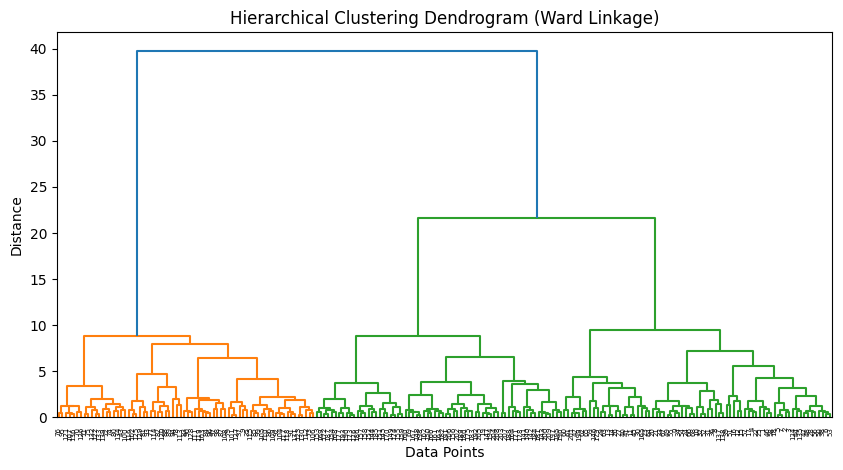

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Load dataset with flexible whitespace handling
df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

# Ensure all values are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values (if necessary)
df.dropna(inplace=True)

# Separate features and true labels
X = df.iloc[:, :-1]  # Exclude the last column (features)
y_true = df.iloc[:, -1].astype(int)  # Convert true labels to integer

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal clusters from dendrogram
optimal_clusters = 3

# Define purity score function
def purity_score(y_true, y_pred):
    contingency_matrix = np.zeros((optimal_clusters, optimal_clusters))
    for i in range(optimal_clusters):
        for j in range(optimal_clusters):
            contingency_matrix[i, j] = np.sum((y_pred == i) & (y_true == j + 1))
    return np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

# Experiment with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
results = {}

for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=method)
    clusters = clustering.fit_predict(X_scaled)

    # Compute Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, clusters)

    # Compute Purity Score
    purity = purity_score(y_true, clusters)

    results[method] = {'Silhouette Score': silhouette_avg, 'Purity Score': purity}

# Print results
for method, scores in results.items():
    print(f"{method.capitalize()} Linkage:")
    print(f"  - Silhouette Score: {scores['Silhouette Score']:.4f}")
    print(f"  - Purity Score: {scores['Purity Score']:.4f}\n")

# Plot Dendrogram for visualization
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## 8 Question

For this part, cluster the data using the k-mediods algorithm for k=3. Evaluate the
clustering using the Silhouette coefficient and Purity as before.

<ipython-input-22-265a5771bae1>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)


Silhouette Coefficient: 0.3992
Purity Score: 0.8952


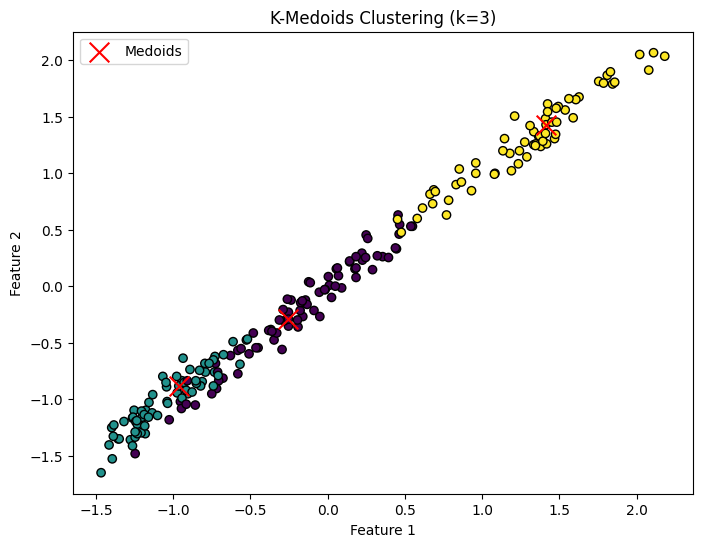

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# Load dataset with flexible whitespace handling
df = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

# Ensure all values are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values (if necessary)
df.dropna(inplace=True)

# Separate features and true labels
X = df.iloc[:, :-1]  # Exclude the last column (features)
y_true = df.iloc[:, -1].astype(int)  # Convert true labels to integer

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define purity score function
def purity_score(y_true, y_pred):
    contingency_matrix = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            contingency_matrix[i, j] = np.sum((y_pred == i) & (y_true == j + 1))
    return np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

# Apply K-Medoids Clustering with k=3
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
y_kmedoids = kmedoids.fit_predict(X_scaled)

# Evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, y_kmedoids)
purity = purity_score(y_true, y_kmedoids)

# Print evaluation results
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")
print(f"Purity Score: {purity:.4f}")

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmedoids, cmap='viridis', edgecolor='k')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Medoids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Medoids Clustering (k=3)')
plt.legend()
plt.show()

The Silhouette Coefficient (0.3992) suggests moderate clustering quality, meaning some clusters might slightly overlap, but overall, the separation is reasonable. The Purity Score (0.8952) is quite high, indicating that about 90% of data points are correctly grouped according to ground truth labels. This suggests that K-Medoids performs well for this dataset.

## 9 Question

What are the limitations of k-means which are addressed by k-medoids algorithms?

K-Means is very sensitive to outliers and
noise because it uses mean-based centroids, while K-Medoids is more robust since it selects actual data points as cluster centers.

K-Means works best with spherical clusters, but K-Medoids can handle arbitrarily shaped clusters better.

K-Means only works with Euclidean distance, while K-Medoids can use different distance metrics like Manhattan or Cosine.

K-Means updates its centroids iteratively, leading to unstable cluster centers, whereas K-Medoids keeps its medoids fixed as real data points, making it more stable.

K-Medoids is computationally more expensive because it calculates pairwise distances between points, unlike K-Means, which is faster.



## 10 Question

Based on your evaluations, which method provided the better clustering? Do the
Silhouette coefficient and purity agree with each other on these clustering algorithms?

Ward Linkage (Agglomerative Clustering) is the best method because it has the highest Silhouette Score (0.3926) and Purity Score (0.9286), meaning it forms well-separated and accurate clusters.

K-Medoids has the highest purity (0.8952) but a slightly lower Silhouette Score (0.3992), meaning it aligns well with labels but clusters may overlap.

K-Means is decent with Silhouette Score (0.4007) and Purity Score (0.7277) but not as good as Ward Linkage.

Single Linkage is the worst, with Silhouette Score (-0.0056) and Purity Score (0.3476), meaning it failed to make meaningful clusters.
Silhouette Score and Purity mostly agree, but K-Medoids had a lower Silhouette Score despite high Purity, showing it groups well but has some overlapping clusters.